<a href="https://colab.research.google.com/github/aayushmanace/Computer-Vision/blob/main/MidSem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label


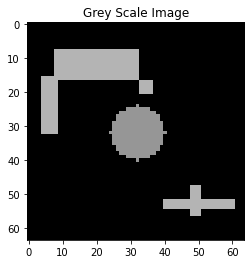

In [ ]:
img = cv.imread("shapes.png")
plt.imshow(img)
plt.title('Grey Scale Image')
plt.show()

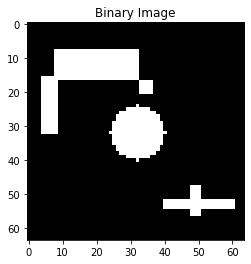

In [ ]:
ret, thresh1 = cv.threshold(img, 100,255, cv.THRESH_BINARY)
plt.imshow(thresh1)
plt.title('Binary Image')
plt.show()

In [ ]:
from skimage.measure import regionprops

In [ ]:
label_img = label(thresh1)
regions = regionprops(label_img)

In [ ]:
for props in regions:
    print("Area: ",props.area)
    print("BoundingBox: ", props.bbox)
    print("Contour: ", props.coords)


Area:  975
BoundingBox:  (8, 4, 0, 33, 37, 3)
Contour:  [[ 8  8  0]
 [ 8  8  1]
 [ 8  8  2]
 ...
 [32  8  0]
 [32  8  1]
 [32  8  2]]
Area:  591
BoundingBox:  (24, 24, 0, 41, 41, 3)
Contour:  [[24 32  0]
 [24 32  1]
 [24 32  2]
 ...
 [40 32  0]
 [40 32  1]
 [40 32  2]]
Area:  243
BoundingBox:  (48, 40, 0, 57, 61, 3)
Contour:  [[48 48  0]
 [48 48  1]
 [48 48  2]
 [48 49  0]
 [48 49  1]
 [48 49  2]
 [48 50  0]
 [48 50  1]
 [48 50  2]
 [49 48  0]
 [49 48  1]
 [49 48  2]
 [49 49  0]
 [49 49  1]
 [49 49  2]
 [49 50  0]
 [49 50  1]
 [49 50  2]
 [50 48  0]
 [50 48  1]
 [50 48  2]
 [50 49  0]
 [50 49  1]
 [50 49  2]
 [50 50  0]
 [50 50  1]
 [50 50  2]
 [51 48  0]
 [51 48  1]
 [51 48  2]
 [51 49  0]
 [51 49  1]
 [51 49  2]
 [51 50  0]
 [51 50  1]
 [51 50  2]
 [52 40  0]
 [52 40  1]
 [52 40  2]
 [52 41  0]
 [52 41  1]
 [52 41  2]
 [52 42  0]
 [52 42  1]
 [52 42  2]
 [52 43  0]
 [52 43  1]
 [52 43  2]
 [52 44  0]
 [52 44  1]
 [52 44  2]
 [52 45  0]
 [52 45  1]
 [52 45  2]
 [52 46  0]
 [52 46  1]


In [ ]:
label_img = label(thresh1,1)
print("N4 labels: ",len(label_img))

N4 labels:  64


In [ ]:
label_img = label(thresh1,2)
print("N8 labels: ",len(label_img))

N8 labels:  64


In [ ]:
from skimage.morphology import dilation

Text(0.5, 1.0, 'Dilated Img')

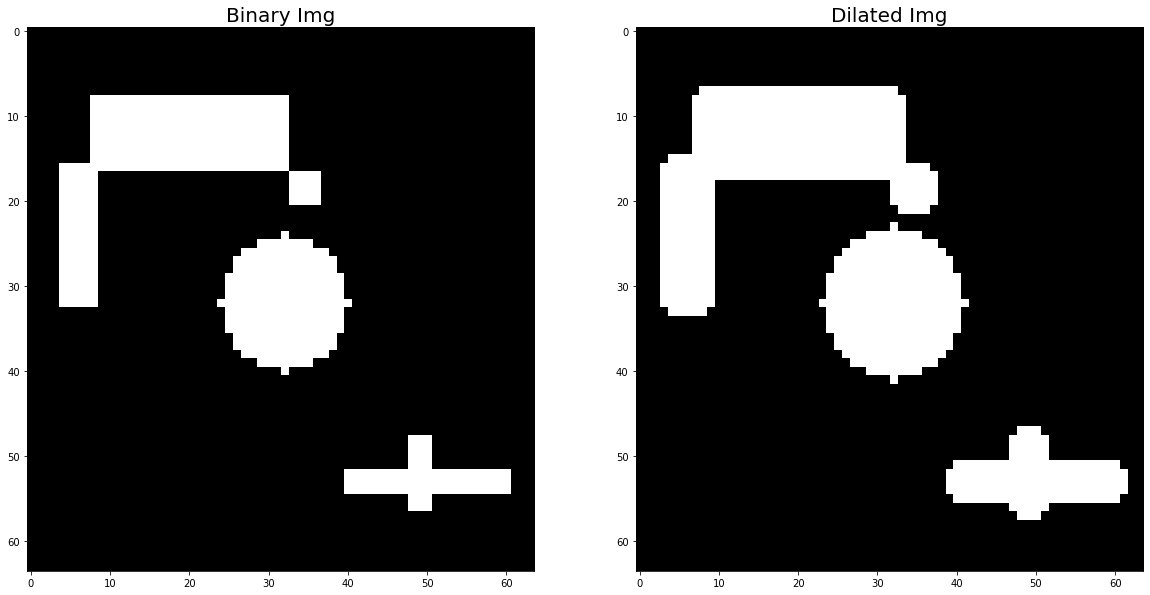

In [ ]:
fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(121)
ax.imshow(thresh1, aspect='auto')
ax.set_title('Binary Img', fontsize=20)

ax = fig.add_subplot(122)
ax.imshow(dilation(thresh1), aspect='auto')
ax.set_title('Dilated Img', fontsize=20)

# Problem 3

In [ ]:
l1 = np.array([1,1,-5])
l2 = np.array([4,-5,7])
hc = np.cross(l1,l2)
ec = hc/hc[-1]
Euclidean = ec[:-1]
print("The Euclidean Coordinate is", (Euclidean[0], Euclidean[1]))

The Euclidean Coordinate is (2.0, 3.0)


# Problem 4

In [ ]:
R = np.array([
    [0.9,0.4,0.1732],
    [-0.4183,0.9043,0.0854],
    [-0.1225,-0.1493,0.9812]
])
Cw = np.array([-1,-2,-3]) #location of the camera-center in world coordinates

Extrinsic Parameter takes the form of $[R|t]$

Let C be a column vector describing the location of the camera-center in world coordinates, and let Rc be the rotation matrix describing the camera's orientation with respect to the world coordinate axes. The transformation matrix that describes the camera's pose is then $[Rc|C]$

 And we have $[R|t]$ = $[Rc^T|-Rc^TC]$

In [ ]:
Rc = R.T

In [ ]:
t = -Rc@Cw.T

In [ ]:
np.concatenate((R,t), axis=1)

array([[ 0.9   ,  0.4   ,  0.1732, -0.3041],
       [-0.4183,  0.9043,  0.0854,  1.7607],
       [-0.1225, -0.1493,  0.9812,  3.2876]])